# Problem 1
Roman numerals are represented by seven different symbols: `I`, `V`, `X`, `L`, `C`, `D` and `M`.

| **Symbol**   | **Value**   |
|--------------|-------------|
| `I`          | `1`         |
| `V`          | `5`         |
| `X`          | `10`        |
| `L`          | `50`        |
| `C`          | `100`       |
| `D`          | `500`       |
| `M`          | `1000`      |

For example, `2` is written as `II` in Roman numeral, just two ones added together. `12` is written as `XII`, which is simply `X + II`. The number `27` is written as `XXVII`, which is `XX` + `V` + `II`.

Roman numerals are usually written largest to smallest from left to right. However, the numeral for four is not IIII. Instead, the number four is written as IV. Because the one is before the five we subtract it making four. The same principle applies to the number nine, which is written as IX. There are six instances where subtraction is used:

* `I` can be placed before `V` (`5`) and `X` (`10`) to make `4` and `9`.
* `X` can be placed before `L` (`50`) and `C` (`100`) to make `40` and `90`. 
* `C` can be placed before `D` (`500`) and `M` (`1000`) to make `400` and `900`.

Given a roman numeral, convert it to an integer.

**Test Cases**
* `"III"`
* `"LVIII"`
* `"MCMXCIV"`

In [9]:
class Solution:
    def romanToInt(self, s_in: str) -> int:
        map = {
            "b":    0,
            "I":    1,
            "V":    5,
            "X":    10,
            "L":    50,
            "C":    100,
            "D":    500,
            "M":    1000,
            "a":    100000
        }

        s = "a" + s_in + "b"

        sum = 0 # initialize sum
        for i in range(1,len(s_in)+1):
            if map[s[i]] < map[s[i-1]] and map[s[i+1]] > map[s[i]]:
                # decrease because of decrement
                sum -= map[s[i]]
            else: # decrease because of increment
                sum += map[s[i]]

        return sum

s = Solution()
print(s.romanToInt("MCMXCIV"))



1994


# Problem 2
Given an array of characters `chars`, compress it using the following algorithm:

Begin with an empty string `s`. For each group of **consecutive repeating characters** in `chars`:

* If the group's length is `1`, append the character to `s`.
* Otherwise, append the character followed by the group's length.

The compressed string `s` **should not be returned separately**, but instead, be stored **in the input character array** **`chars`**. Note that group lengths that are `10` or longer will be split into multiple characters in `chars`.\
After you are done **modifying the input array**, return the *new length of the array*.\
You must write an algorithm that uses only constant extra space.

**Example 1:**\
Input: `chars = ["a","a","b","b","c","c","c"]`\
Output: Return `6`, and the first `6` characters of the input array should be: `["a","2","b","2","c","3"]`\
Explanation: The groups are `"aa"`, `"bb"`, and `"ccc"`. This compresses to `"a2b2c3"`.

**Example 2:**\
**Input:** `chars = ["a"]`\
**Output:** Return `1`, and the first character of the input array should be: `["a"]`.\
**Explanation:** The only group is `"a"`, which remains uncompressed since it's a single character.

**Example 3:**\
**Input:** `chars = ["a","b","b","b","b","b","b","b","b","b","b","b","b"]`\
**Output:** Return `4`, and the first `4` characters of the input array should be: `["a","b","1","2"]`.\
**Explanation:** The groups are `"a"` and `"bbbbbbbbbbbb"`. This compresses to `"ab12"`.


**Constraints:**
* `1 <= chars.length <= 2000`
* `chars[i]` is a lowercase English letter, uppercase English letter, digit, or symbol.

In [10]:
from typing import List

class Solution:
    def compress(self, chars: List[str]) -> int:
        
        cur = None; i = 0; n_append = 0
        while i < len(chars)-n_append:
            j = i
            num = 0
            while j < len(chars)-n_append and chars[j] == chars[i]:
                
                num += 1
                j += 1

            chars.append(chars[i])
            n_append += 1
            chars = chars[j:]
            if num > 1:
                for digit in list(str(num)):
                    chars.append(digit)
                    n_append += 1

            i = 0

        return chars, len(chars)

chars = ["a","a","b","b","c","c","c"]
# chars = ["a",]
# chars = ["a","b","b","b","b","b","b","b","b","b","b","b","b"]
sol = Solution()
c_new, n = sol.compress(chars=chars)
print(c_new)

['a', '2', 'b', '2', 'c', '3']


# Problem 3

Given an array `ranks` of ranks of students in a school. All students need to be split into groups `k`. Find the total 'imbalance' of all groups. An imabalance of a group can be found as:

* Sorting each group in the order of their ranks.
* A group contributes to imbalance if any 2 students in the sorted array have a rank difference of more than 1.

Find the total sum of imbalance of all such groups.

This is an example :
**given**: `[4,1,3,2]`

| **Symbol**    | **Imbalance** |
|---------------|---------------|
| `[1]`         | `0`           |
| `[2]`         | `0`           |
| `[3]`         | `0`           |
| `[4]`         | `0`           |
| `[4,1]`       | `1`           |
| `[4,3]`       | `0`           |
| `[4,2]`       | `1`           |
| `[4,1,3,2]`   | `0`           |
| `[1,3]`       | `1`           |
| `[1,2]`       | `0`           |
| `[3,2]`       | `0`           |

Answer `= 1 + 1 + 1 = 3`

In [11]:
#!/bin/python3

import math
import os
import random
import re
import sys

#
# Complete the 'findTotalImbalance' function below.
#
# The function is expected to return a LONG_INTEGER.
# The function accepts INTEGER_ARRAY rank as parameter.
#
"""
First we need to generate all the possible groups from a given list of ranks
Then for each group we calculate the imbalance by first sorting
"""
def genPermutations(rank):
    perms = []
    for i in range(len(rank)+1):
        for j in range(i+1, len(rank)+1):
            set_add = set(rank[i:j])
            add_set = True
            for set_i in perms:
                if set_i == set_add:
                    add_set = False
            if add_set:
                perms+=[set_add]
            
    return perms

def findTotalImbalance(rank):
    # Write your code here
    
    groups = genPermutations(rank)
    total_imb = 0
    imb_vector = []
    for group in groups:
        group = sorted(group)    
        diff = [group[i] - group[i-1] for i in range(1,len(group))] # this is the difference
        imb = 0
        for d in diff:
            if d > 1:
                imb += 1
                
        total_imb += imb
        
    return total_imb
            
rank = [4,4,1,3,2]
g = genPermutations(rank)
result = findTotalImbalance(rank)

print(result)


3


# Problem 4

Draw `n` samples from a given multinomial distribution

```
distro = [(1,0.15),(4,0.43),('k',0.18),('f',0.24)]
```


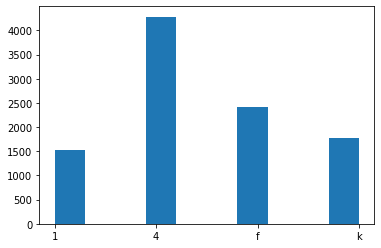

In [225]:
from random import random
import matplotlib.pyplot as plt

distro = [(1,0.15),(4,0.43),('k',0.18),('f',0.24)]

def sample(distro,n_samples):
    cdf = []
    c_prob = 0
    for key,prob in distro:
        c_prob += prob
        cdf += [(key,c_prob)]

    samples = []
    for n in range(n_samples):
        X = random()
        for key,c_prob in cdf:
            if X <= c_prob:
                samples += [key]
                break

    # another way
    samples = []
    for n in range(n_samples):
        X = random()
        diffs = [c_prob - X if c_prob>=X else 1.0 for _,c_prob in cdf]
        samples+=[distro[min(range(len(diffs)), key=lambda x : diffs[x])][0]]

    return samples

samples = sample(distro,10000)
samples = sorted(samples,key=lambda v: (isinstance(v, str), v))
plt.hist(samples)
plt.show()